## This project aims to predict any need for treatment to complete vascularization in neonates with retinopathy of prematurity (ROP)

### event1 = y (labels) 
event1 has two values : 
1: a treatment, either intravitreal bevacizumab or laser photocoagulation, has been utilized for the neonate
0: retinal vascularization completed without any treatment

### Features were defined as follows (features were selected as the domain expert recommendation at this step):
#### Sex: binary
#### Mother_Education: ordinary
#### Father_Education: ordinary
#### CPR: binary
#### low_Apgar: binary
#### Birth_Age: continuous
#### Birth_Weight: continuous
#### NICU_Time: continuous
#### Age: continuous
#### Weight: continuous
#### ROP_Stage: ordinary
#### ROP_Zone: ordinary
#### Plus: binary {1=plus, 2=No plus}

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import xgboost as xgb

In [2]:
ROP_Dataset = pd.read_csv("DataSet-ROP.csv")

## Exploratory Data Analysis (EDA)

In [3]:
ROP_Dataset.head()

,Patient_ID,event1,Sex,Mother_Education,Father_Education,CPR,low_Apgar,Birth_Age,Birth_Weight,NICU_Time,Age,weight,OD_ROP_Stage,OD_ROP_Zone,OD_Plus
0,A-00-82-02,1,2,NaN,NaN,2,2,29.0,2000.0,50.0,37.0,2100.0,2.0,2.0,2.0
1,A-00-82-13,1,2,NaN,NaN,2,2,30.0,1280.0,18.0,35.0,NaN,2.0,2.0,NaN
2,A-00-82-82,1,2,NaN,NaN,2,2,26.0,750.0,65.0,35.0,1620.0,2.0,2.0,2.0
3,A-00-82-84,1,1,NaN,NaN,2,2,30.0,1320.0,12.0,36.0,2500.0,2.0,2.0,2.0
4,A-00-82-99,1,2,NaN,NaN,2,2,29.0,1350.0,0.0,38.0,1650.0,1.0,1.0,1.0


In [4]:
ROP_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9692 entries, 0 to 9691
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Patient_ID        9692 non-null   object 
 1   event1            9692 non-null   int64  
 2   Sex               9692 non-null   int64  
 3   Mother_Education  7468 non-null   float64
 4   Father_Education  7467 non-null   float64
 5   CPR               9692 non-null   int64  
 6   low_Apgar         9692 non-null   int64  
 7   Birth_Age         9671 non-null   float64
 8   Birth_Weight      9682 non-null   float64
 9   NICU_Time         9687 non-null   float64
 10  Age               7547 non-null   float64
 11  weight            7769 non-null   float64
 12  OD_ROP_Stage      7866 non-null   float64
 13  OD_ROP_Zone       7894 non-null   float64
 14  OD_Plus           5064 non-null   float64
dtypes: float64(10), int64(4), object(1)
memory usage: 1.1+ MB


In [5]:
ROP_Dataset.shape

(9692, 15)

In [6]:
ROP_Dataset.describe()

,event1,Sex,Mother_Education,Father_Education,CPR,low_Apgar,Birth_Age,Birth_Weight,NICU_Time,Age,weight,OD_ROP_Stage,OD_ROP_Zone,OD_Plus
count,9692.000000,9692.000000,7468.000000,7467.000000,9692.000000,9692.000000,9671.000000,9682.000000,9687.000000,7547.000000,7769.000000,7866.000000,7894.000000,5064.000000
mean,0.044160,1.530231,2.032003,2.012857,1.998762,1.999484,32.707786,1812.117538,12.798080,37.403604,2434.640366,0.863717,2.503547,1.975513
std,0.205461,0.499111,1.235786,1.246198,0.035167,0.022709,2.521802,501.403679,12.909448,2.638996,820.008230,0.823209,0.533367,0.154569
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,25.000000,560.000000,0.000000,29.000000,700.000000,0.000000,1.000000,1.000000
25%,0.000000,1.000000,1.000000,1.000000,2.000000,2.000000,31.000000,1500.000000,5.000000,36.000000,1900.000000,0.000000,2.000000,2.000000
50%,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,33.000000,1800.000000,9.000000,37.000000,2300.000000,1.000000,3.000000,2.000000
75%,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,34.000000,2090.000000,16.000000,39.000000,2800.000000,2.000000,3.000000,2.000000
max,1.000000,2.000000,6.000000,6.000000,2.000000,2.000000,38.000000,4000.000000,96.000000,44.000000,11000.000000,5.000000,3.000000,2.000000


### "event1" is the label y

In [28]:
ROP_Dataset["event1"].value_counts()

event1
0    9264
1     428
Name: count, dtype: int64

### Let's look at the features

In [29]:
ROP_Dataset["Sex"].value_counts()

Sex
2    5139
1    4553
Name: count, dtype: int64

In [30]:
ROP_Dataset["Mother_Education"].value_counts()

Mother_Education
1.0    3384
2.0    2280
4.0    1200
3.0     319
5.0     236
6.0      49
Name: count, dtype: int64

In [31]:
ROP_Dataset["Father_Education"].value_counts()

Father_Education
1.0    3446
2.0    2278
4.0     996
3.0     380
5.0     298
6.0      69
Name: count, dtype: int64

In [32]:
ROP_Dataset["CPR"].value_counts()

CPR
2    9680
1      12
Name: count, dtype: int64

In [33]:
ROP_Dataset["low_Apgar"].value_counts()

low_Apgar
2    9687
1       5
Name: count, dtype: int64

In [34]:
ROP_Dataset["OD_ROP_Stage"].value_counts()

OD_ROP_Stage
0.0    3232
1.0    2496
2.0    2130
5.0       6
4.0       2
Name: count, dtype: int64

In [35]:
ROP_Dataset["OD_ROP_Zone"].value_counts()

OD_ROP_Zone
3.0    4111
2.0    3647
1.0     136
Name: count, dtype: int64

In [36]:
ROP_Dataset["OD_Plus"].value_counts()

OD_Plus
2.0    4940
1.0     124
Name: count, dtype: int64

## Visualization

### Distribution plots of features with continuous scale

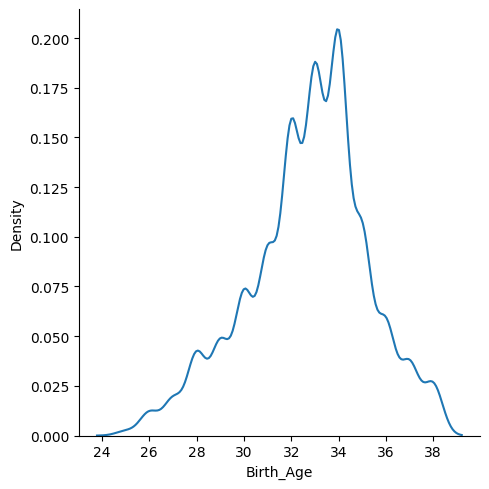

In [37]:
sns.displot(ROP_Dataset, x="Birth_Age", kind="kde")

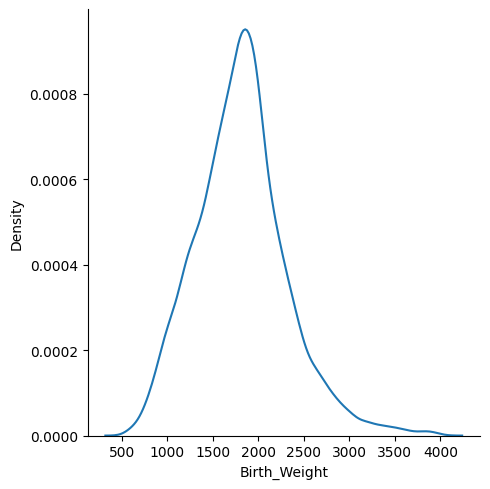

In [38]:
sns.displot(ROP_Dataset, x="Birth_Weight", kind="kde")

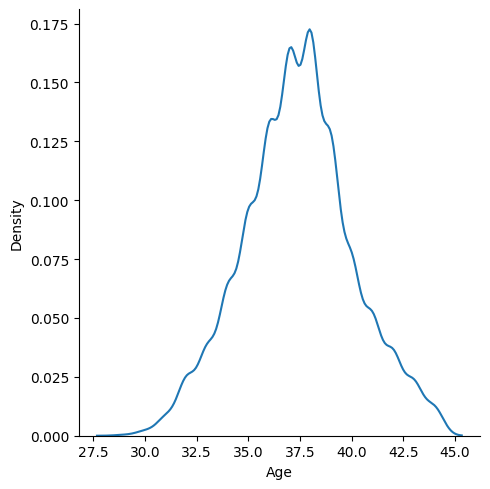

In [39]:
sns.displot(ROP_Dataset, x="Age", kind="kde")

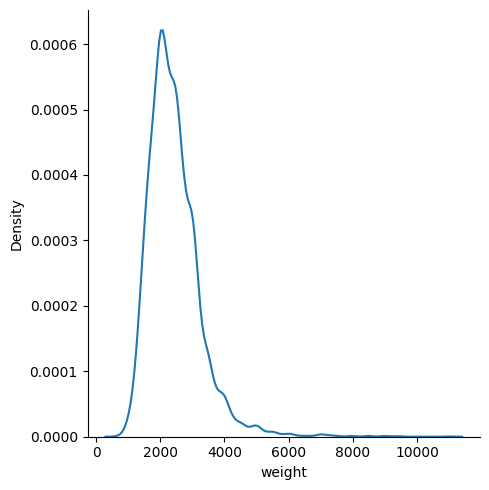

In [40]:
sns.displot(ROP_Dataset, x="weight", kind="kde")

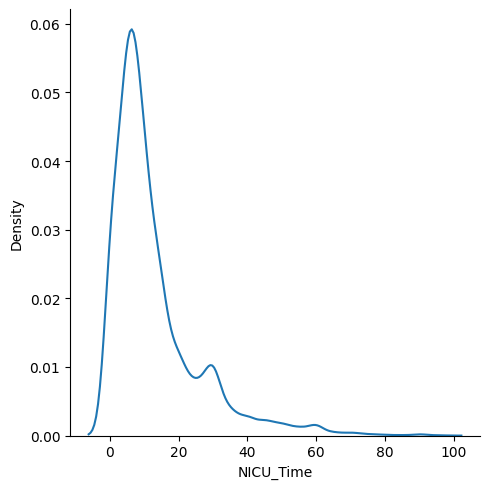

In [41]:
sns.displot(ROP_Dataset, x="NICU_Time", kind="kde")

### Bar-plot for qualitative variables

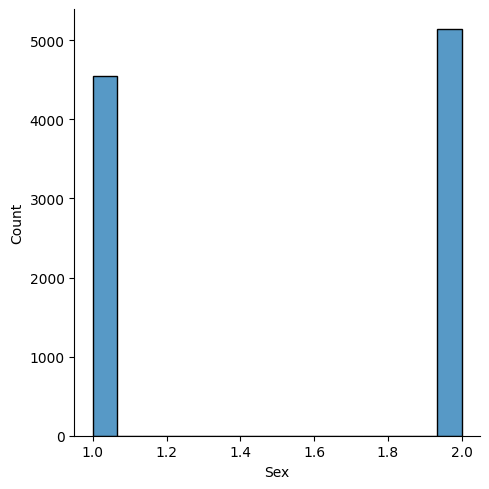

In [42]:
sns.displot(ROP_Dataset, x="Sex", shrink=1)

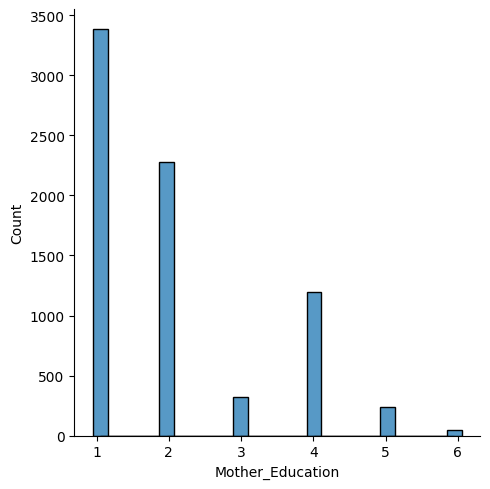

In [43]:
sns.displot(ROP_Dataset, x="Mother_Education", shrink=2)

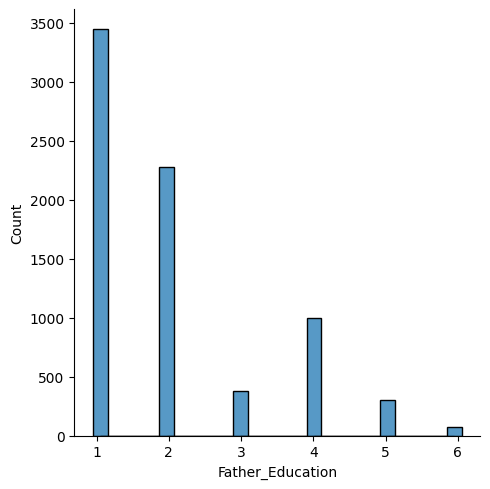

In [44]:
sns.displot(ROP_Dataset, x="Father_Education", shrink=2)

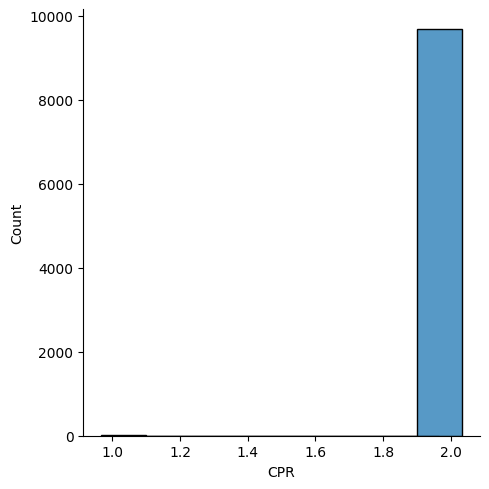

In [45]:
sns.displot(ROP_Dataset, x="CPR", shrink=2)

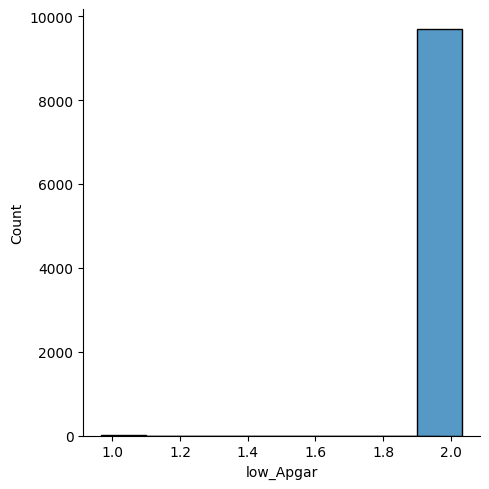

In [46]:
sns.displot(ROP_Dataset, x="low_Apgar", shrink=2)

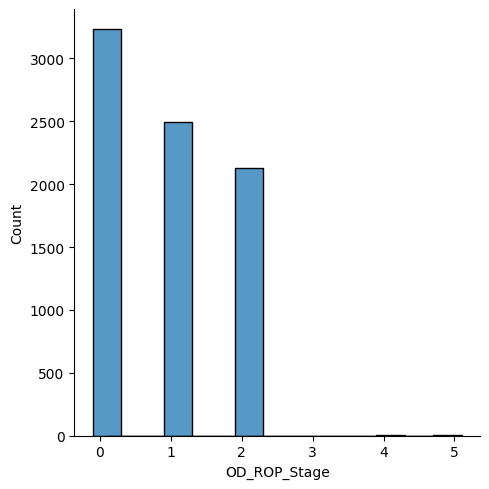

In [47]:
sns.displot(ROP_Dataset, x="OD_ROP_Stage", shrink=2)

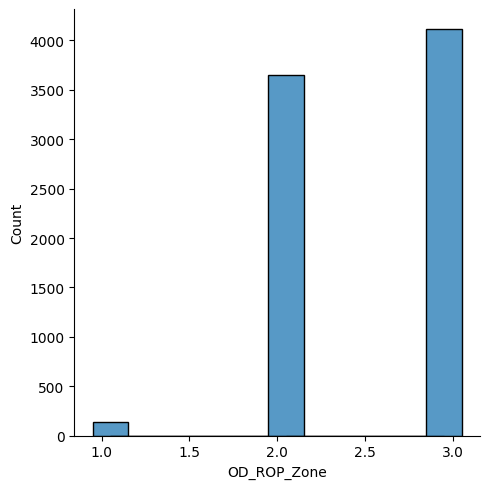

In [48]:
sns.displot(ROP_Dataset, x="OD_ROP_Zone", shrink=2)

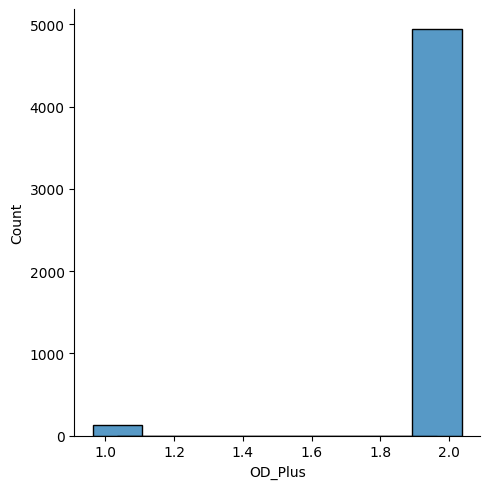

In [49]:
sns.displot(ROP_Dataset, x="OD_Plus", shrink=2)

### Pairplot analysis to evaluate the pairwise comparison between the features

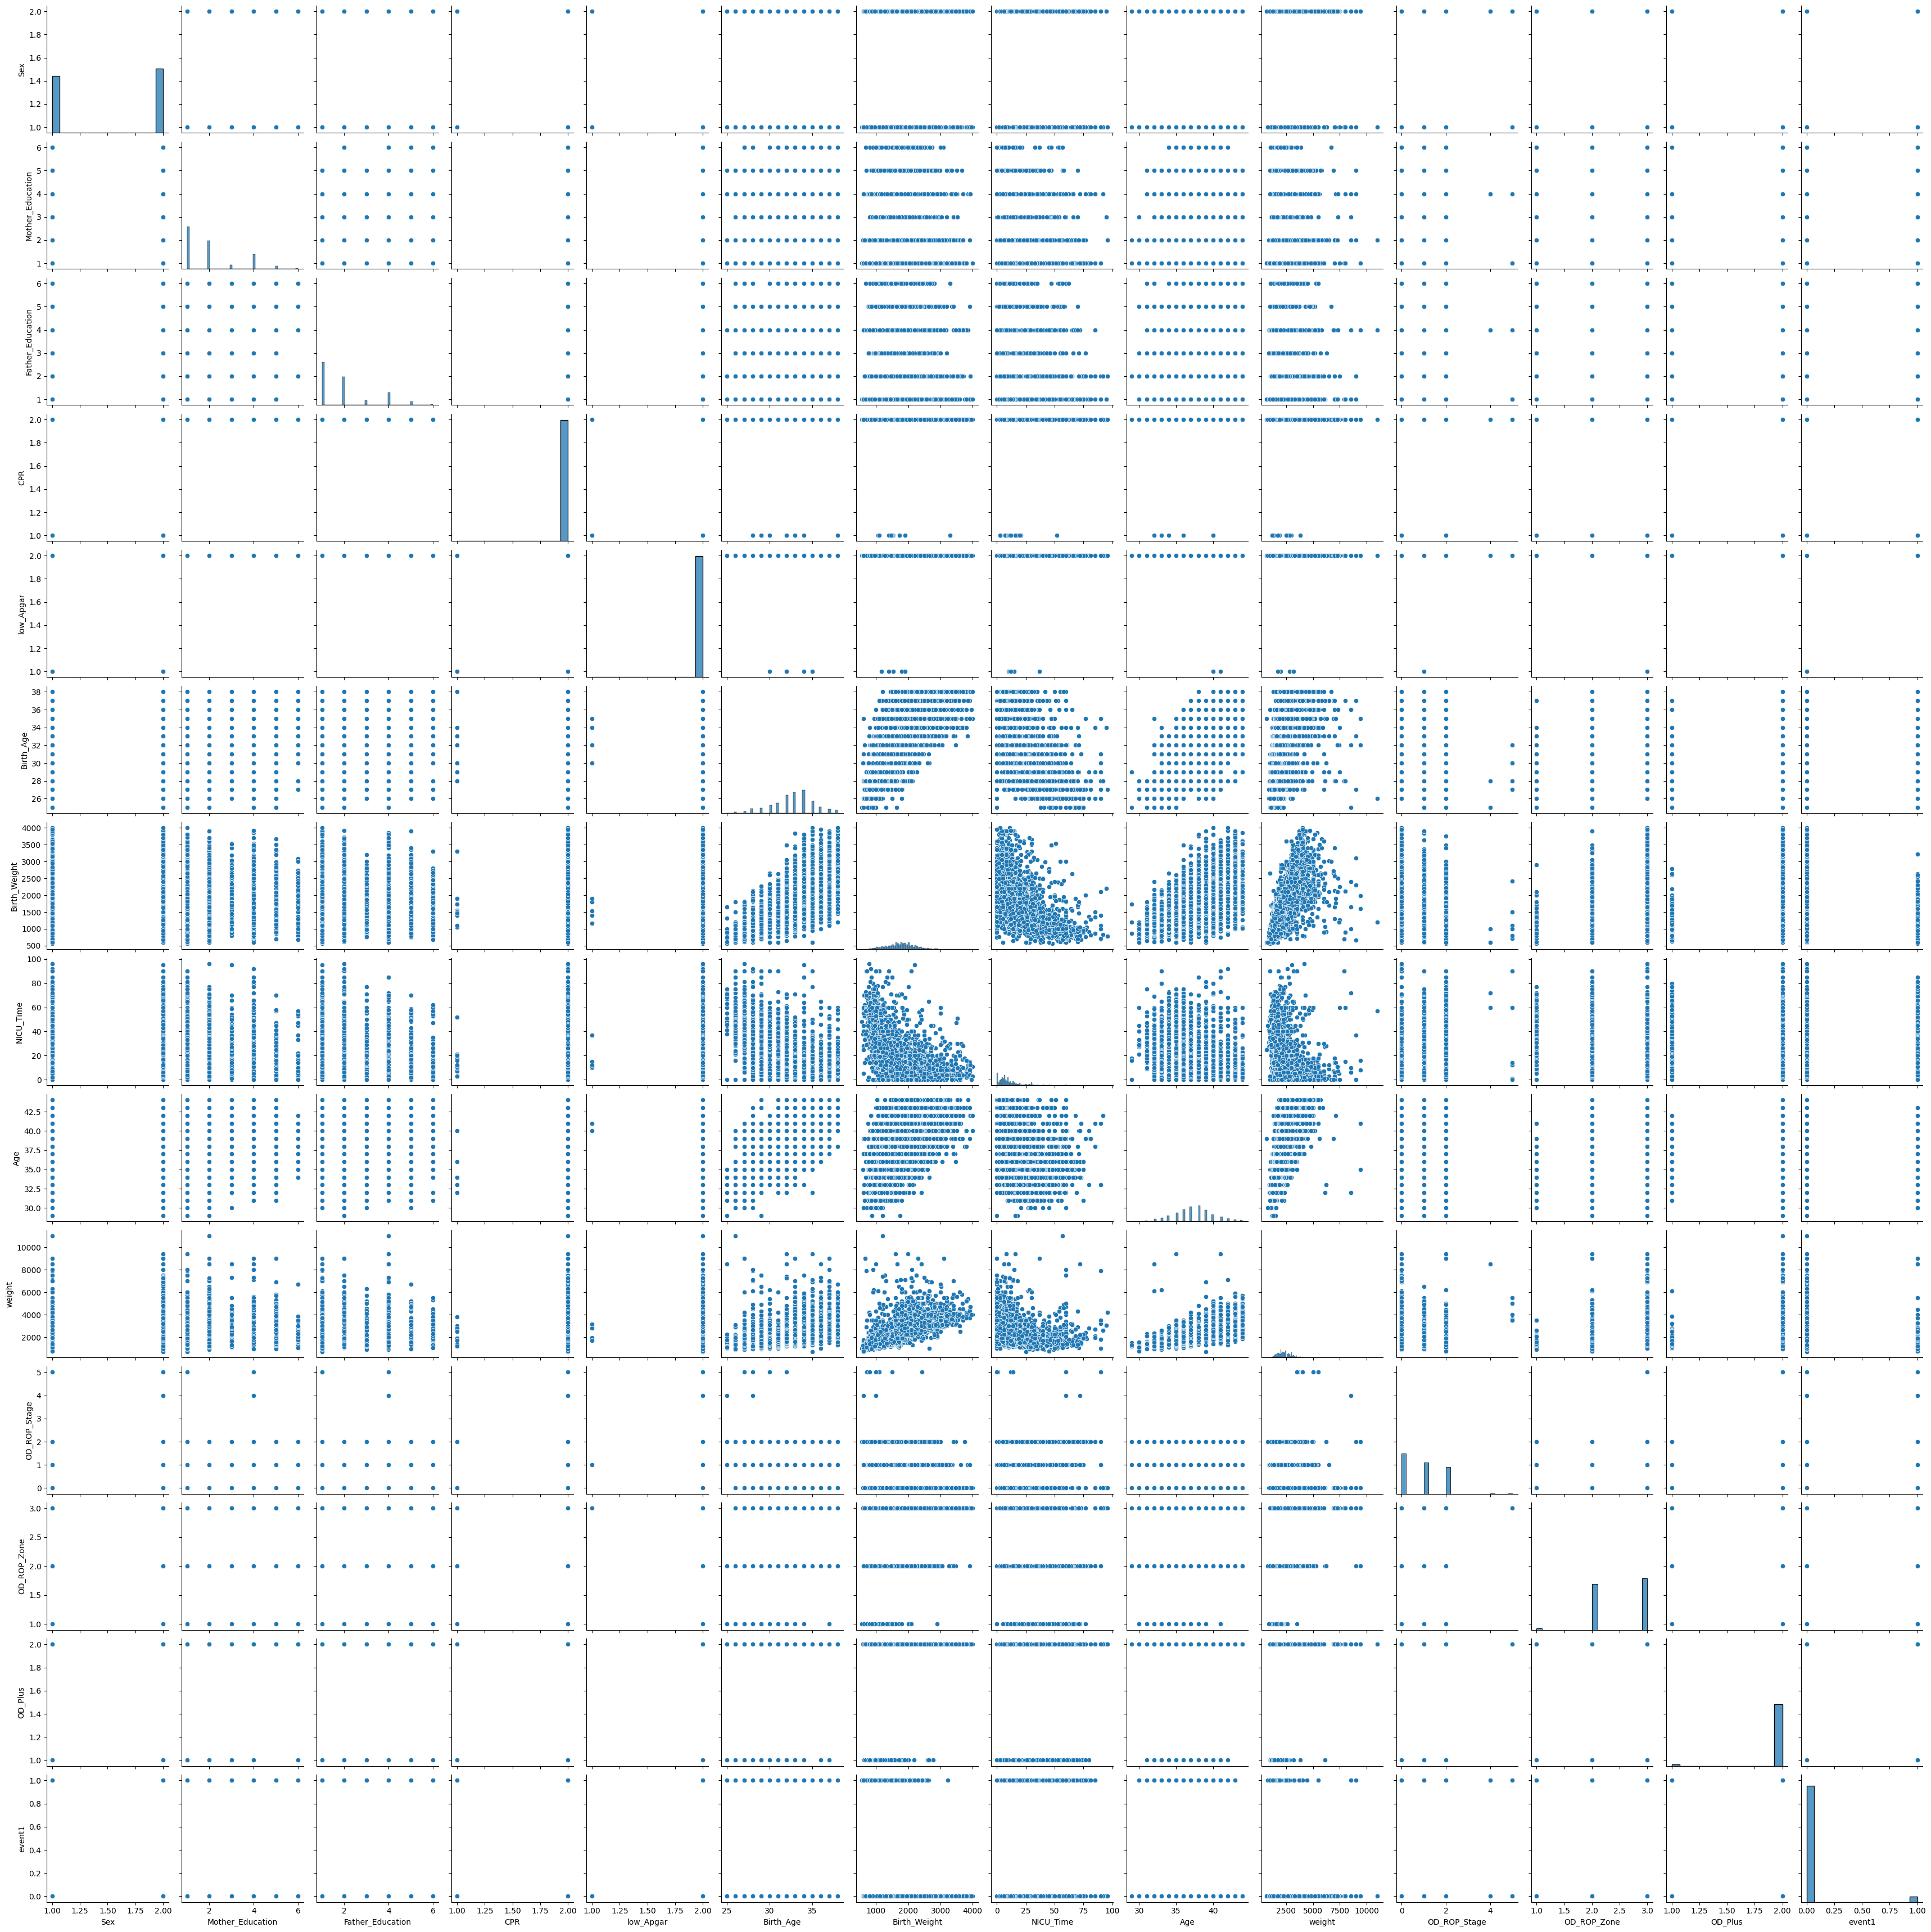

In [50]:
sns.pairplot(ROP_Dataset[["Sex","Mother_Education","Father_Education","CPR","low_Apgar","Birth_Age","Birth_Weight","NICU_Time","Age","weight","OD_ROP_Stage","OD_ROP_Zone","OD_Plus","event1"]])
plt.show()

### Correlation analysis

<Axes: >

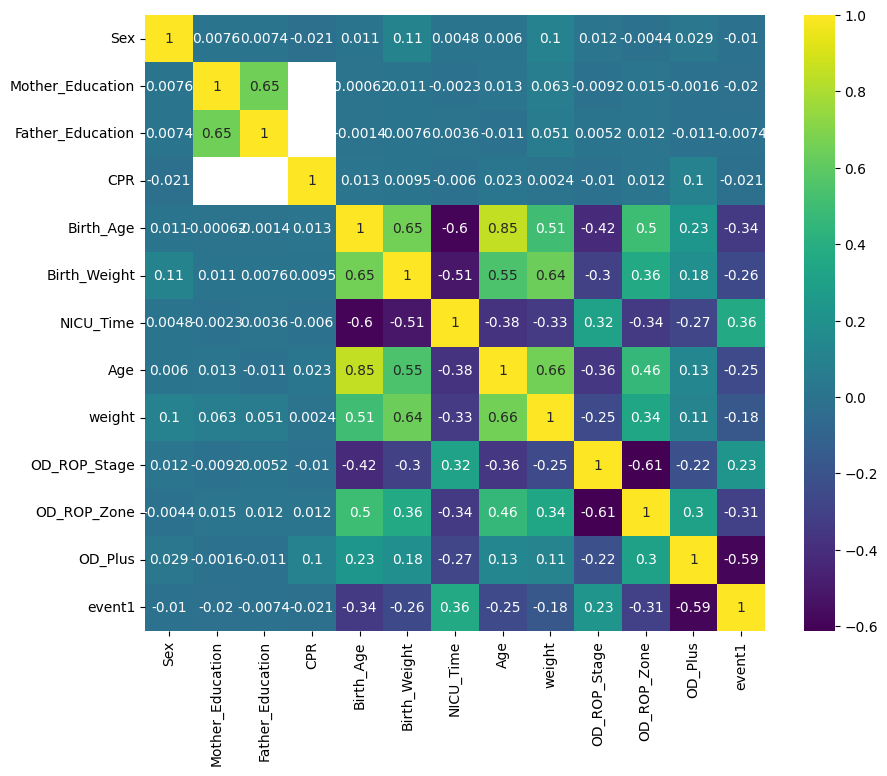

In [51]:
corr = ROP_Dataset[["Sex","Mother_Education","Father_Education","low_Apgar","CPR","Birth_Age","Birth_Weight","NICU_Time","Age","weight","OD_ROP_Stage","OD_ROP_Zone","OD_Plus","event1"]].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap='viridis', annot=True)

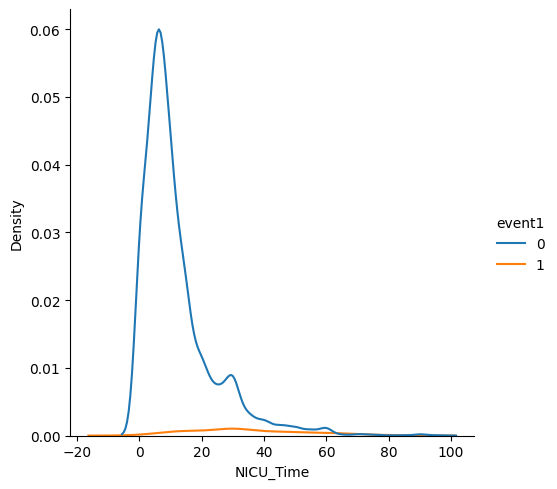

In [52]:
sns.displot(ROP_Dataset, x="NICU_Time", hue='event1',kind="kde")

<Axes: xlabel='event1', ylabel='NICU_Time'>

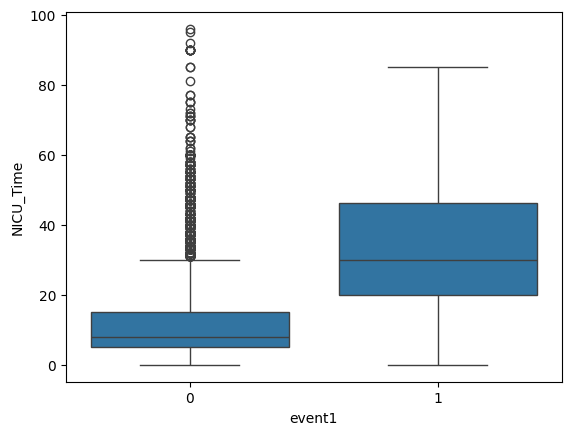

In [53]:
sns.boxplot(x="event1", y="NICU_Time", data=ROP_Dataset)

<Axes: xlabel='event1', ylabel='Birth_Age'>

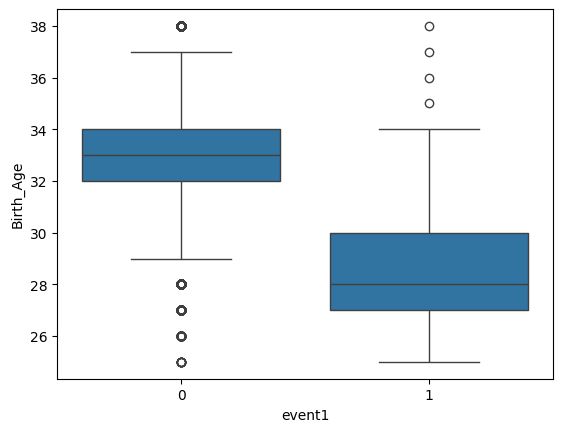

In [54]:
sns.boxplot(x="event1", y="Birth_Age", data=ROP_Dataset)

<Axes: xlabel='event1', ylabel='Birth_Weight'>

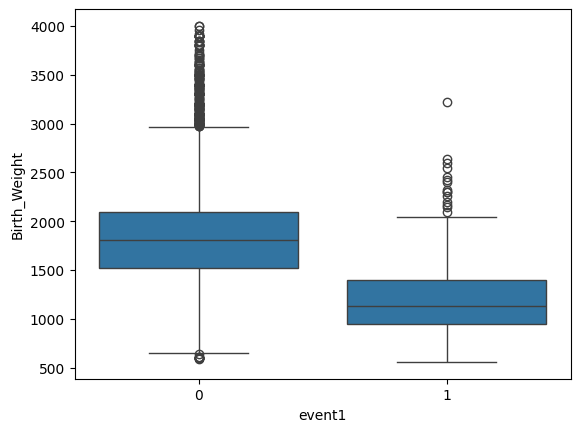

In [55]:
sns.boxplot(x="event1", y="Birth_Weight", data=ROP_Dataset)

## Handling missing values

In [7]:
ROP_Dataset = ROP_Dataset[["Sex","Mother_Education","Father_Education","CPR","low_Apgar","Birth_Age","Birth_Weight","NICU_Time","Age","weight","OD_ROP_Stage","OD_ROP_Zone","OD_Plus","event1"]]

In [8]:
ROP_Dataset.fillna(ROP_Dataset.mean(), inplace=True)

In [9]:
ROP_Dataset.isnull().sum()

Sex                 0
Mother_Education    0
Father_Education    0
CPR                 0
low_Apgar           0
Birth_Age           0
Birth_Weight        0
NICU_Time           0
Age                 0
weight              0
OD_ROP_Stage        0
OD_ROP_Zone         0
OD_Plus             0
event1              0
dtype: int64

### Prepare Data for Machine learning and Feature Scaling

In [10]:
X = ROP_Dataset[["Sex","Mother_Education","Father_Education","CPR","low_Apgar","Birth_Age","Birth_Weight","NICU_Time","Age","weight","OD_ROP_Stage","OD_ROP_Zone","OD_Plus"]]
Y = ROP_Dataset[["event1"]]

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [60]:
y_train.value_counts()

event1
0         7421
1          332
Name: count, dtype: int64

In [61]:
y_test.value_counts()

event1
0         1843
1           96
Name: count, dtype: int64

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the models

### KNN

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn.score(X_test, y_test)

C:\Users\user\miniconda3\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9613202681794739

#### Model Evaluation Metrics

In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1843
           1       0.74      0.33      0.46        96

    accuracy                           0.96      1939
   macro avg       0.86      0.66      0.72      1939
weighted avg       0.96      0.96      0.95      1939



Text(0.5, 1.0, 'Confusion Matrix')

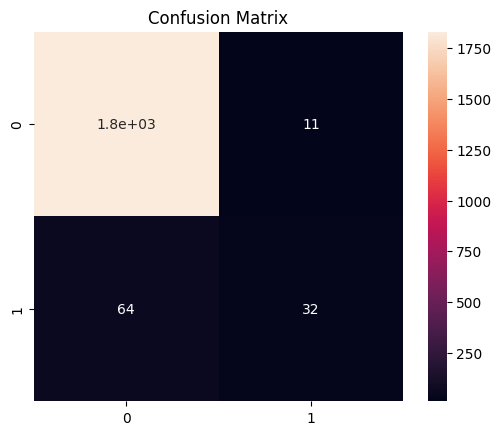

In [19]:
cm =confusion_matrix(y_test, y_pred)
sns.heatmap(cm, square=True , annot=True)
plt.title('Confusion Matrix')

In [13]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred) 
roc_auc = auc(fpr, tpr)

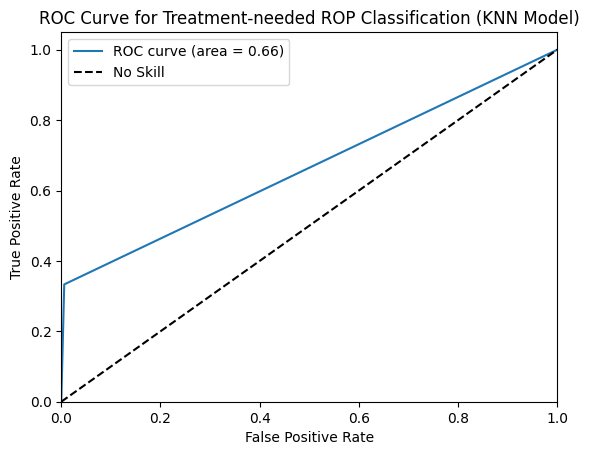

In [14]:
plt.figure()  
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Treatment-needed ROP Classification (KNN Model)')
plt.legend()
plt.show()

## Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\user\miniconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [21]:
y_pred = logreg.predict(X_test)

#### Model Evaluation Metrics

In [22]:
from sklearn import metrics
print('The accuracy of Logistic Regression is: ', (metrics.accuracy_score(y_test, y_pred)))

The accuracy of Logistic Regression is:  0.9659618359979371


In [19]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1836    7]
 [  59   37]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1843
           1       0.84      0.39      0.53        96

    accuracy                           0.97      1939
   macro avg       0.90      0.69      0.76      1939
weighted avg       0.96      0.97      0.96      1939



Text(0.5, 1.0, 'Confusion Matrix')

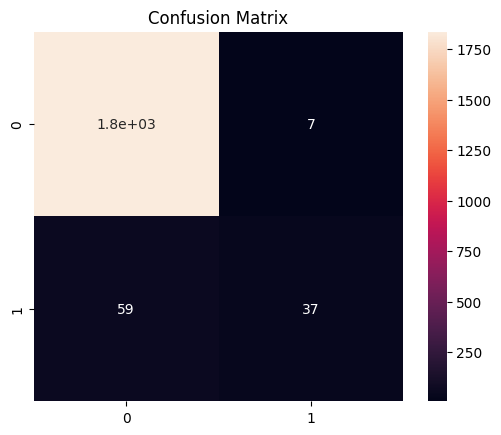

In [23]:
cm =confusion_matrix(y_test, y_pred)
sns.heatmap(cm, square=True , annot=True)
plt.title('Confusion Matrix')

In [21]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred) 
roc_auc = auc(fpr, tpr)


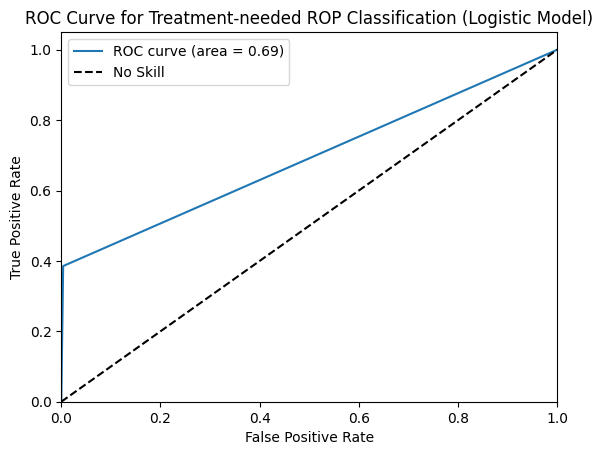

In [22]:
plt.figure()  
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Treatment-needed ROP Classification (Logistic Model)')
plt.legend()
plt.show()

## Naive Bayes

In [24]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

C:\Users\user\miniconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [25]:
y_pred  =  classifier.predict(X_test)

#### Model Evaluation Metrics

In [26]:
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1204  639]
 [   4   92]]
              precision    recall  f1-score   support

           0       1.00      0.65      0.79      1843
           1       0.13      0.96      0.22        96

    accuracy                           0.67      1939
   macro avg       0.56      0.81      0.51      1939
weighted avg       0.95      0.67      0.76      1939



Text(0.5, 1.0, 'Confusion Matrix')

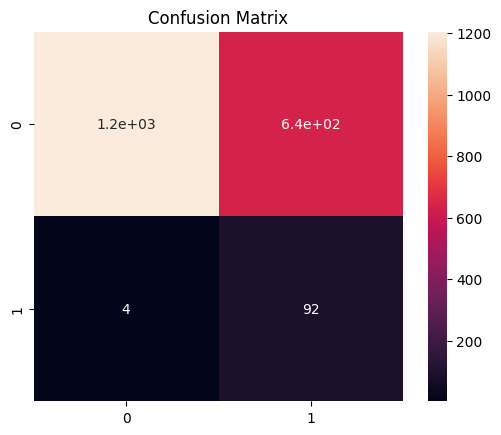

In [27]:
cm =confusion_matrix(y_test, y_pred)
sns.heatmap(cm, square=True , annot=True)
plt.title('Confusion Matrix')

In [26]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred) 
roc_auc = auc(fpr, tpr)

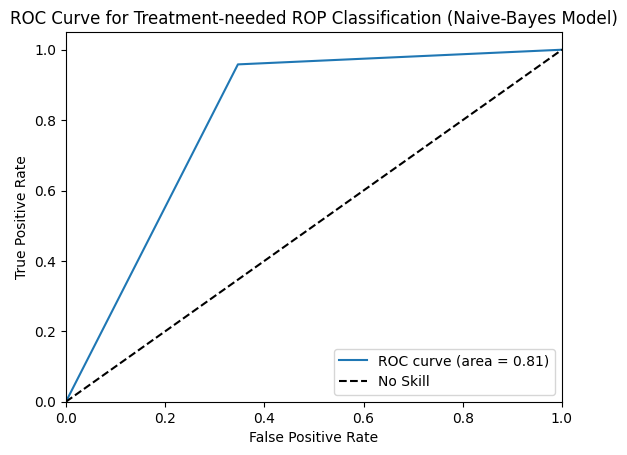

In [27]:
plt.figure()  
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Treatment-needed ROP Classification (Naive-Bayes Model)')
plt.legend()
plt.show()

## Support Vector Machine

In [28]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

C:\Users\user\miniconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [29]:
y_pred = svclassifier.predict(X_test)

#### Model Evaluation Metrics

In [30]:
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1841    2]
 [  71   25]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1843
           1       0.93      0.26      0.41        96

    accuracy                           0.96      1939
   macro avg       0.94      0.63      0.69      1939
weighted avg       0.96      0.96      0.95      1939



Text(0.5, 1.0, 'Confusion Matrix')

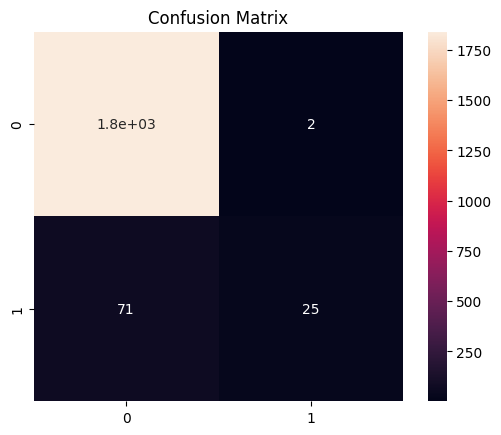

In [31]:
cm =confusion_matrix(y_test, y_pred)
sns.heatmap(cm, square=True , annot=True)
plt.title('Confusion Matrix')

In [33]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred) 
roc_auc = auc(fpr, tpr)

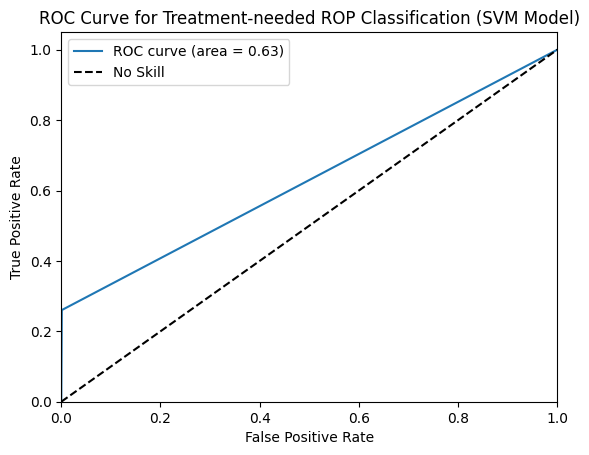

In [34]:
plt.figure()  
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Treatment-needed ROP Classification (SVM Model)')
plt.legend()
plt.show()

## Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [33]:
y_pred = classifier.predict(X_test)

#### Model Evaluation Metrics

In [34]:
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1780   63]
 [  52   44]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1843
           1       0.41      0.46      0.43        96

    accuracy                           0.94      1939
   macro avg       0.69      0.71      0.70      1939
weighted avg       0.94      0.94      0.94      1939



Text(0.5, 1.0, 'Confusion Matrix')

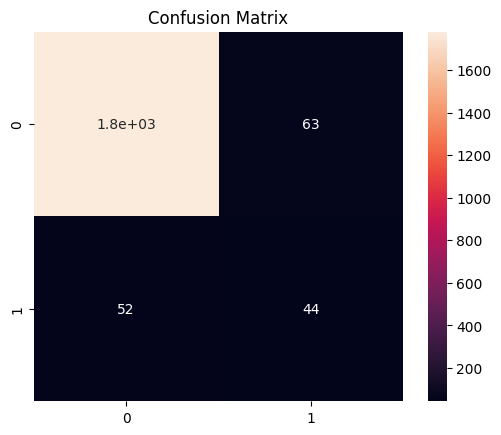

In [35]:
cm =confusion_matrix(y_test, y_pred)
sns.heatmap(cm, square=True , annot=True)
plt.title('Confusion Matrix')

In [38]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred) 
roc_auc = auc(fpr, tpr)

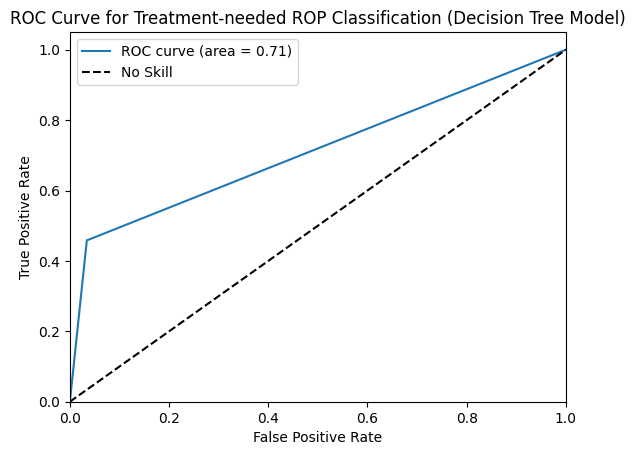

In [39]:
plt.figure()  
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Treatment-needed ROP Classification (Decision Tree Model)')
plt.legend()
plt.show()

## XGBoosting

In [36]:
from xgboost import XGBClassifier

In [37]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [38]:
y_pred = model.predict(X_test)

#### Model Evaluation Metrics

In [39]:
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1825   18]
 [  58   38]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1843
           1       0.68      0.40      0.50        96

    accuracy                           0.96      1939
   macro avg       0.82      0.69      0.74      1939
weighted avg       0.95      0.96      0.96      1939



Text(0.5, 1.0, 'Confusion Matrix')

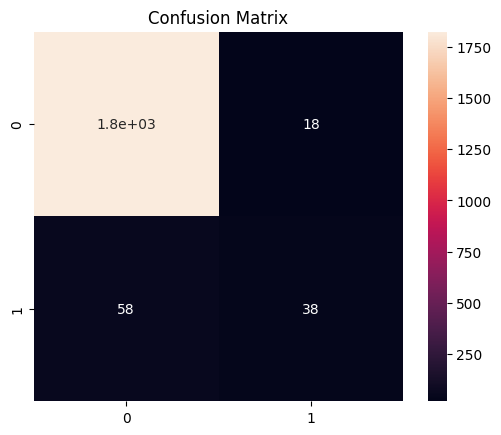

In [40]:
cm =confusion_matrix(y_test, y_pred)
sns.heatmap(cm, square=True , annot=True)
plt.title('Confusion Matrix')

In [45]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred) 
roc_auc = auc(fpr, tpr)

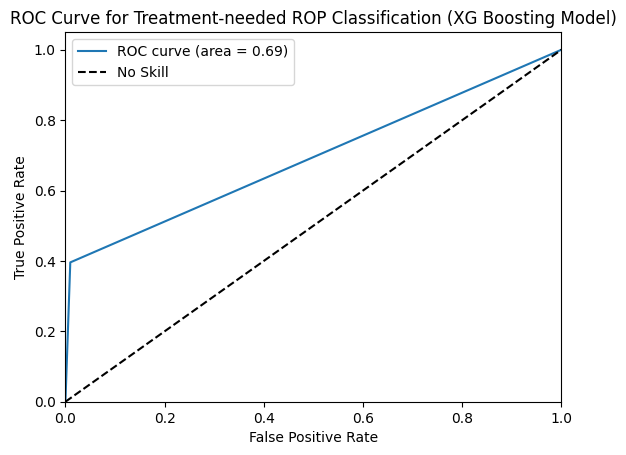

In [46]:
plt.figure()  
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Treatment-needed ROP Classification (XG Boosting Model)')
plt.legend()
plt.show()

## Artificial Neural networks (ANN)

In [48]:
import tensorflow as tf
ann = tf.keras.models.Sequential()

In [49]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [50]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [51]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [52]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [53]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100


243/243 [==============================] - 2s 2ms/step - loss: 0.6114 - accuracy: 0.6835
Epoch 2/100
243/243 [==============================] - 0s 2ms/step - loss: 0.2233 - accuracy: 0.9572
Epoch 3/100
243/243 [==============================] - 1s 2ms/step - loss: 0.1381 - accuracy: 0.9625
Epoch 4/100
243/243 [==============================] - 1s 2ms/step - loss: 0.1180 - accuracy: 0.9671
Epoch 5/100
243/243 [==============================] - 1s 2ms/step - loss: 0.1096 - accuracy: 0.9671
Epoch 6/100
243/243 [==============================] - 1s 2ms/step - loss: 0.1056 - accuracy: 0.9674
Epoch 7/100
243/243 [==============================] - 1s 2ms/step - loss: 0.1028 - accuracy: 0.9680
Epoch 8/100
243/243 [==============================] - 1s 2ms/step - loss: 0.1010 - accuracy: 0.9674
Epoch 9/100
243/243 [==============================] - 1s 2ms/step - loss: 0.0994 - accuracy: 0.9685
Epoch 10/100
243/243 [==============================] - 1s 2ms/step - loss: 0.0984 - accu

In [54]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1825   18]
 [  58   38]]


0.960804538421867

Text(0.5, 1.0, 'Confusion Matrix')

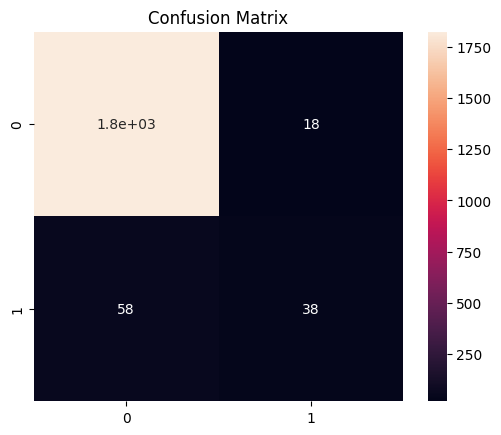

In [41]:
cm =confusion_matrix(y_test, y_pred)
sns.heatmap(cm, square=True , annot=True)
plt.title('Confusion Matrix')

In [74]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1843
           1       0.68      0.40      0.50        96

    accuracy                           0.96      1939
   macro avg       0.82      0.69      0.74      1939
weighted avg       0.95      0.96      0.96      1939



In [56]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred) 
roc_auc = auc(fpr, tpr)

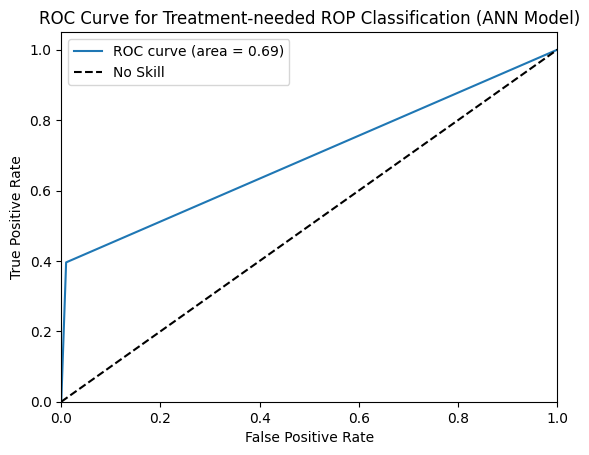

In [57]:
plt.figure()  
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Treatment-needed ROP Classification (ANN Model)')
plt.legend()
plt.show()

## Feature importance analysis with Random-Forrest Classifier

In [13]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion = 'entropy', random_state = 42)
rfc.fit(X_train, y_train)

C:\Users\user\miniconda3\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(criterion='entropy', random_state=42)

In [14]:
rfc_pred_train = rfc.predict(X_train)
print('Training Set Evaluation F1-Score=>',f1_score(y_train,rfc_pred_train))

Training Set Evaluation F1-Score=> 1.0


In [15]:
rfc_pred_test = rfc.predict(X_test)
print('Testing Set Evaluation F1-Score=>',f1_score(y_test,rfc_pred_test))

Testing Set Evaluation F1-Score=> 0.5142857142857142


In [16]:
rfc.feature_importances_

array([1.95127060e-02, 3.78664163e-02, 3.86884944e-02, 2.10061725e-04,
       2.45656765e-06, 1.52757196e-01, 1.52103527e-01, 1.80640922e-01,
       7.09216672e-02, 9.99954191e-02, 6.95330384e-02, 6.79158935e-02,
       1.09852202e-01])

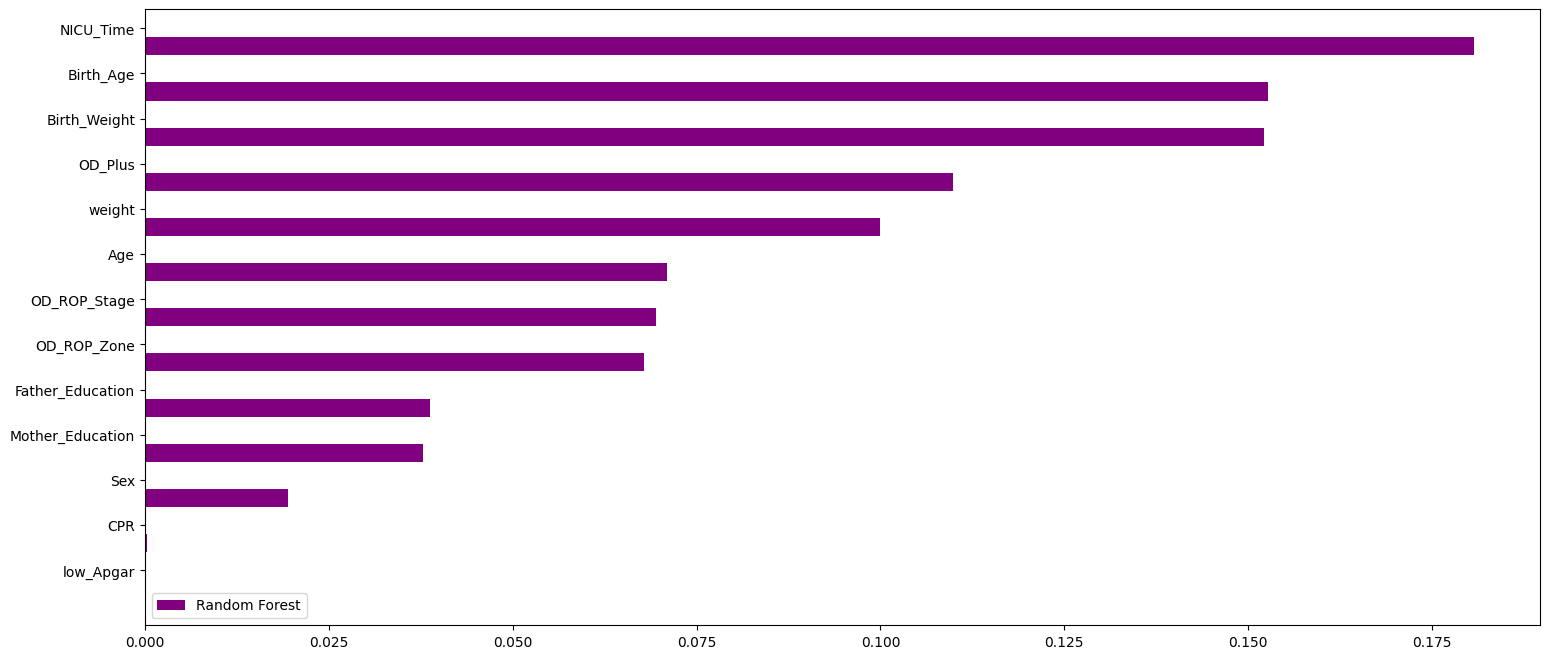

In [17]:
feature_importance=pd.DataFrame({'rfc':rfc.feature_importances_},index=ROP_Dataset.columns[:-1])
feature_importance.sort_values(by='rfc',ascending=True,inplace=True)

index = np.arange(len(feature_importance))
fig, ax = plt.subplots(figsize=(18,8))
rfc_feature=ax.barh(index,feature_importance['rfc'],0.4,color='purple',label='Random Forest')
ax.set(yticks=index+0.4,yticklabels=feature_importance.index)

ax.legend()
plt.show()